# DSC 680 Project 2
# Caroline Barte

## Imports

First, I am importing the necessary libraries to complete the model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Then, I am importing the CSV file from Kaggle. 

In [3]:
data = pd.read_csv("ProductDataset.csv")

## Initial Cleaning

To begin, I am printing some initial infon for the data. This includes the column names and some examples, and the types of each column entry. 

In [4]:
print(data.head())
print(data.info())

   S.No BrandName Product ID              Product Name  \
0     1      4711      FR001         Cologne Fragrance   
1     2      109f       DRW1  DRW1 - Westernwear-Women   
2     3      109f       DRW2  DRW2 - Westernwear-Women   
3     4      109f       DRW3  DRW3 - Westernwear-Women   
4     5      109f       DRW4  DRW4 - Westernwear-Women   

                                     Brand Desc  \
0                     ekw eau de cologne 400 ml   
1           womens v- neck short dress - yellow   
2           womens round neck solid top - black   
3    womens round neck stripe shift dress - red   
4  womens round neck solid high low top - black   

                         Product Size Currancy   MRP  SellPrice Discount  \
0                               Small      Rs.  3900       3120  20% off   
1  Size:Medium,Small,X-Large,XX-Large      Rs.  1899        569  70% off   
2     Size:Large,Medium,Small,X-Large      Rs.  1499        599  60% off   
3                   Size:Medium,Small   

Then, I am dropping any columns which will not help with my model. These include serial number, MRP, and currency. 

In [5]:
irrelevant_columns = ['S.No', 'mrp', 'currency']
data.drop(columns=[col for col in irrelevant_columns if col in data.columns], inplace=True)

I'm replacing any spaces in the column names with underscores to make it easier to use column names when building the model. 

In [6]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

Now, I'm checking the whole dataframe using the process below. 

In [7]:
print(data.isnull().sum())

brandname        0
product_id       0
product_name     0
brand_desc       0
product_size     0
currancy         0
mrp             13
sellprice        0
discount         0
category         0
dtype: int64


This shows that my dataset lacks any missing values. If there were any, I would fill them with the correct process, such as using the average. I am also editing the 'discount' column to show the monetary value after the discount, rather than the percentage. 

In [8]:
data['discount'] = data['discount'].str.extract('(\d+)%').astype(float)

## Recommender dataset

Now, I'm ready to build the recommender dataset. I am starting by formatting the dataset to use the column names I want. 

In [9]:
data['combined_features'] = data['product_name'] + ' ' + data['category'] + ' ' + data['brandname']

I am now setting the vectorizer and matrix to used the combined feature dataset, as well as the cosine similarity. 

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['combined_features'])

In [11]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

I created a function to get the index of the product which matches the product id, calculate the similarity scores for all products, sort the products by descending scores, and return a list of products with the most similarity. This is shown below. 

In [12]:
def get_content_based_recommendations(product_id, n=5):
    idx = data.index[data['product_id'] == product_id].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:n + 1]
    product_indices = [i[0] for i in sim_scores]

    return data.iloc[product_indices][['product_id', 'product_name', 'category', 'sellprice']]

Now, I can use the function. This is done by asking the user which product they want recommendations for. Then, the model replaces the "example product ID" varible with a user input. The loop is infinite, so if the shopper wants to continue, they do not have to restart the model. The results are shown below. 

In [21]:
while True:
    example_product_id = input("\nEnter the Product ID you want recommendations for (or type 'exit' to quit): ").strip()
    
    if example_product_id.lower() == 'exit':
        print("Exiting the recommendation system. Have a great day!")
        break
    
    recommendations = get_content_based_recommendations(example_product_id, n=5)

    if recommendations is not None:
        print(f"\nTop 5 Recommendations for Product ID {example_product_id}:")
        print(recommendations)


Enter the Product ID you want recommendations for (or type 'exit' to quit):  AND703



Top 5 Recommendations for Product ID AND703:
     product_id              product_name         category  sellprice
1886     AND704  AND704 - Fragrance-Women  Fragrance-Women       1350
1887     AND705  AND705 - Fragrance-Women  Fragrance-Women        400
1888     AND706  AND706 - Fragrance-Women  Fragrance-Women        960
1889     AND707  AND707 - Fragrance-Women  Fragrance-Women        960
1890     AND708  AND708 - Fragrance-Women  Fragrance-Women       1275



Enter the Product ID you want recommendations for (or type 'exit' to quit):  AND708



Top 5 Recommendations for Product ID AND708:
     product_id              product_name         category  sellprice
1885     AND703  AND703 - Fragrance-Women  Fragrance-Women        400
1886     AND704  AND704 - Fragrance-Women  Fragrance-Women       1350
1887     AND705  AND705 - Fragrance-Women  Fragrance-Women        400
1888     AND706  AND706 - Fragrance-Women  Fragrance-Women        960
1889     AND707  AND707 - Fragrance-Women  Fragrance-Women        960



Enter the Product ID you want recommendations for (or type 'exit' to quit):  exit


Exiting the recommendation system. Have a great day!


## Visualizations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


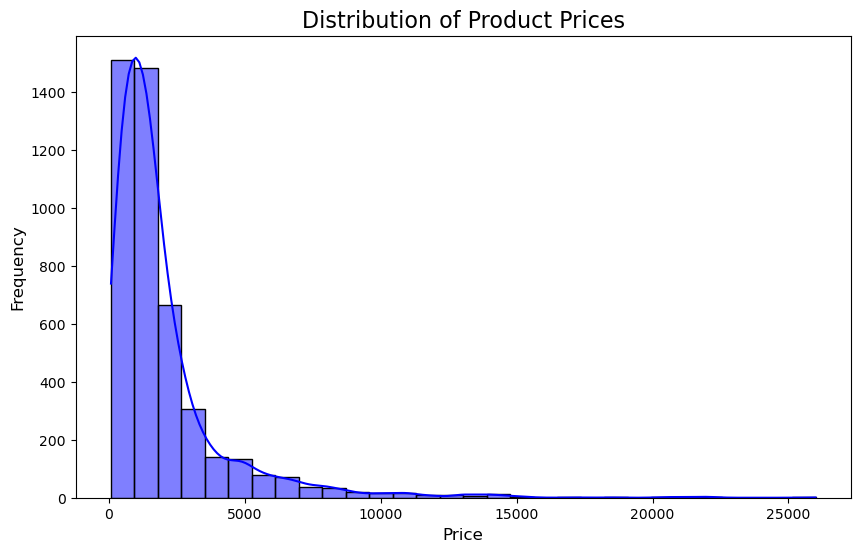

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sellprice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

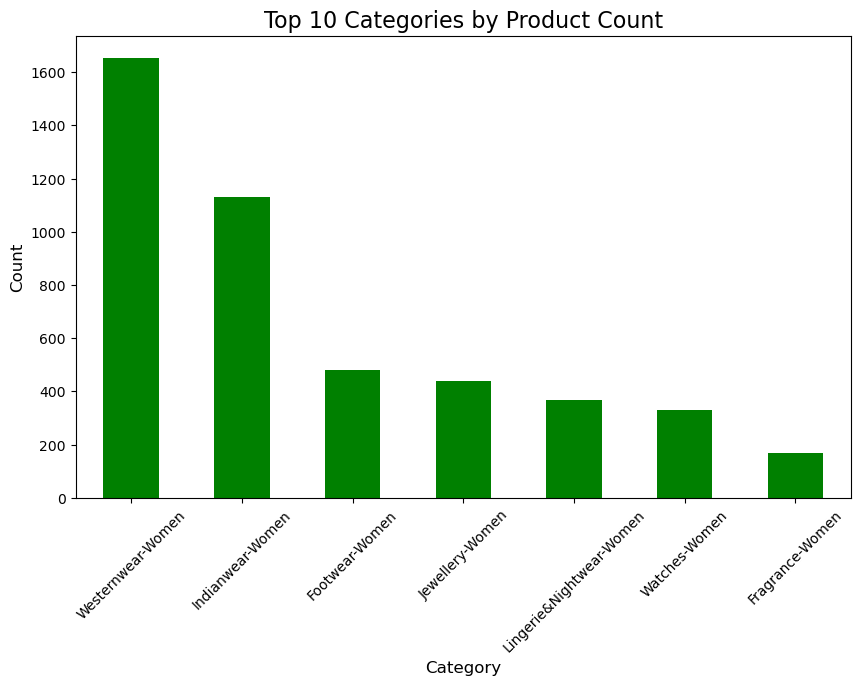

In [16]:
plt.figure(figsize=(10, 6))
top_categories = data['category'].value_counts().head(10)
top_categories.plot(kind='bar', color='green')
plt.title('Top 10 Categories by Product Count', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

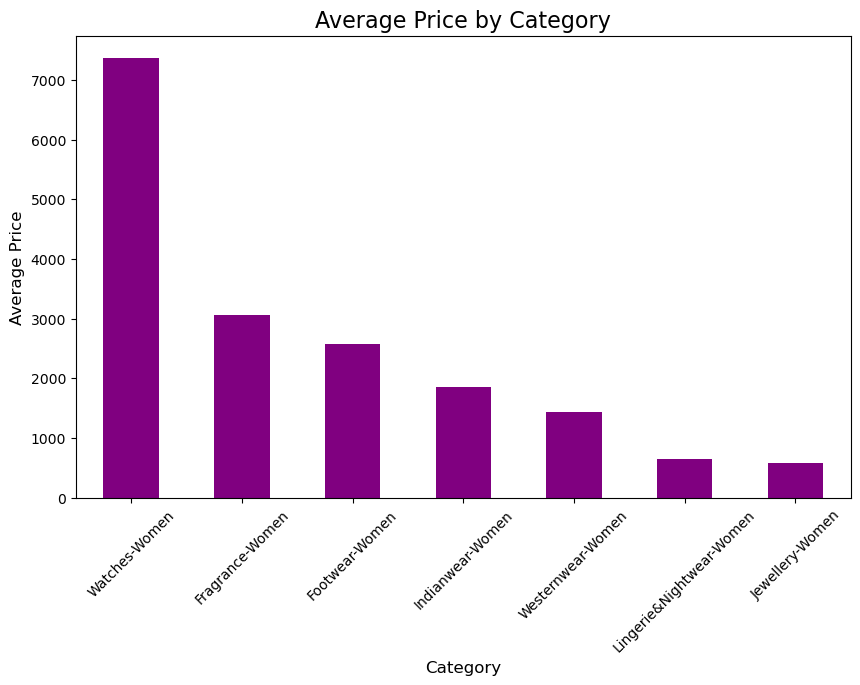

In [17]:
plt.figure(figsize=(10, 6))
avg_price_by_category = data.groupby('category')['sellprice'].mean().sort_values(ascending=False).head(10)
avg_price_by_category.plot(kind='bar', color='purple')
plt.title('Average Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


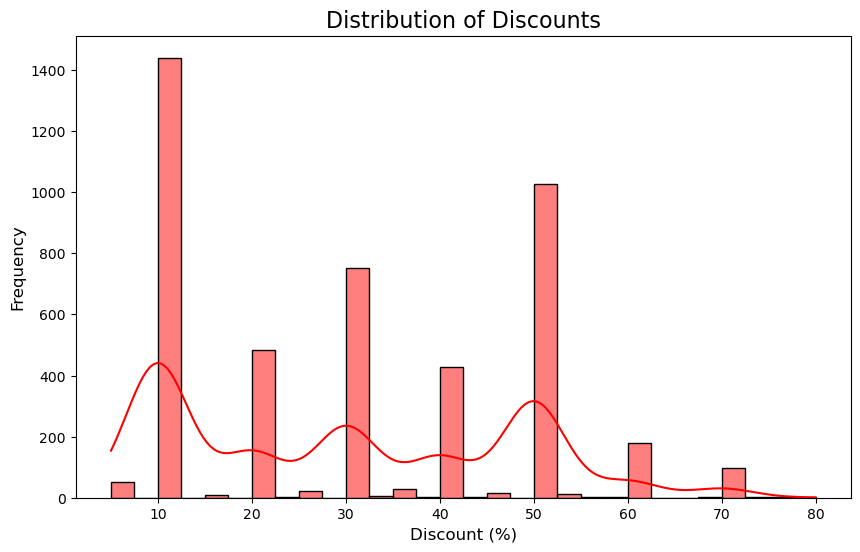

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['discount'].dropna(), kde=True, bins=30, color='red')
plt.title('Distribution of Discounts', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
